In [1]:
import pandas as pd
from scipy import stats
import statistics 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## WALL CLOCK

In [2]:
df_total = pd.read_csv("results_tissue_paper_1.csv")
df_total['Day'] = 1
df_total = df_total[0:60]
for i in range(2,11):
    file_name="results_tissue_paper_{}.csv"
    file_name=file_name.format(i)
    df = pd.read_csv(file_name)
    df['Day'] = i
    df1 = df[0:60]
    df_total = df_total.append(df1, ignore_index=True)
df_total.head(600)

,DESCRIPTION,BRAND,PRICE,RATINGS,REVIEWS,SPONSERED,AMAZONSCHOICE,Limited Time Deal,BestSeller,DealOfDay,ASIN,TIME,DATE,URL,Seller_Name,Day
0,Presto! 2 Ply Kitchen Tissue/Towel Paper Roll ...,Presto!,379,4.4 out of 5 stars,"14,482",Sponsored,NaN,NaN,Best seller,NaN,B07GVVCQY6,15:18:36.209449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
1,Amazon Brand - Solimo 3 Ply Toilet Paper Tissu...,Amazon Brand - Solimo,259,4.4 out of 5 stars,"1,404",Sponsored,NaN,Limited time deal,NaN,NaN,B07M7H1MDM,15:18:36.210449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
2,Presto! 2 Ply Facial Tissue Soft Pack - 200 Pu...,Presto!,305,4.3 out of 5 stars,"7,777",Sponsored,NaN,NaN,Best seller,NaN,B0792T6NXR,15:18:36.212449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
3,Beco Eco Friendly Bamboo Natural Facial Tissue...,Beco,360,4.5 out of 5 stars,"1,395",Sponsored,NaN,NaN,NaN,NaN,B07NBR6M72,15:18:36.214450,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
4,Softouch Tissue Paper Napkins 100 pcs. Each- S...,SofTouch,149,4.2 out of 5 stars,"3,143",NaN,Amazon's Choice,NaN,NaN,NaN,B08HMNX4FQ,15:18:36.216452,2022-02-28,https://www.amazon.in/Softouch-Tissue-Paper-Na...,Cloudtail India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Origami So Soft 2 Ply Facial Tissue Paper / Ti...,Origami,320,4.2 out of 5 stars,"1,701",NaN,NaN,NaN,NaN,NaN,B00W1SO13G,01:01:22.883903,2022-03-11,https://www.amazon.in/Origami-So-Soft-Face-Tis...,Cloudtail India,10
596,Amazon Brand - Presto ! 3 Ply Toilet Paper Tis...,Presto!,330,4.3 out of 5 stars,"3,431",Sponsored,NaN,NaN,NaN,NaN,B097PTGNTF,01:01:22.891900,2022-03-11,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,10
597,"Coze Face Tissue Box (2 Ply, 200 Pulls) | Pack...",COZE,369,4.4 out of 5 stars,174,Sponsored,NaN,NaN,NaN,NaN,B09F3SRJHB,01:01:22.891900,2022-03-11,https://www.amazon.in/gp/slredirect/picassoRed...,VISIONOVA A U/O NARSINGH DASS & CO P. LTD,10
598,"Biogreen Soft Facial/Face Tissues, 2ply, 100 P...",Biogreen,299,4.1 out of 5 stars,154,Sponsored,NaN,NaN,NaN,NaN,B07GYM1LPC,01:01:22.891900,2022-03-11,https://www.amazon.in/gp/slredirect/picassoRed...,Jaapyarose Hygiene Products,10


In [3]:
df_total = df_total[df_total['PRICE'].notna()]
df_total = df_total[df_total['RATINGS'].notna()]
df_total = df_total[df_total['REVIEWS'].notna()]

In [4]:
df_total.reset_index(drop=True, inplace=True)

In [5]:
len(df_total)

590

In [6]:
x=0
y=0
z=0
for i in range(len(df_total)):
    try:
        k = df_total['PRICE'][i]
        a = k.replace(",", "")
        a = float(a)
        df_total['PRICE'][i] = a
        x=x+1
    except:
        a=0
i=0        
for k in df_total['RATINGS']:
    try:
        #k = df_total['RATINGS'][i]
        a = float(k[0:3])
        #print(a)
        df_total['RATINGS'][i] = a
        i=i+1
        y=y+1
    except:
        i=i+1
        #print(df_total['RATINGS'][i])
    
for i in range(len(df_total)):
    try :
        k = df_total['REVIEWS'][i]
        if len(k)>3:
            k=k.split(',')
            k=k[0]+k[1]
        
        df_total['REVIEWS'][i] = int(k)
        z=z+1
    except:
        a=0


<ipython-input-6-6b039225cb2e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['PRICE'][i] = a
<ipython-input-6-6b039225cb2e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['RATINGS'][i] = a
<ipython-input-6-6b039225cb2e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['REVIEWS'][i] = int(k)


In [7]:
df_total

,DESCRIPTION,BRAND,PRICE,RATINGS,REVIEWS,SPONSERED,AMAZONSCHOICE,Limited Time Deal,BestSeller,DealOfDay,ASIN,TIME,DATE,URL,Seller_Name,Day
0,Presto! 2 Ply Kitchen Tissue/Towel Paper Roll ...,Presto!,379.0,4.4,14482,Sponsored,NaN,NaN,Best seller,NaN,B07GVVCQY6,15:18:36.209449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
1,Amazon Brand - Solimo 3 Ply Toilet Paper Tissu...,Amazon Brand - Solimo,259.0,4.4,1404,Sponsored,NaN,Limited time deal,NaN,NaN,B07M7H1MDM,15:18:36.210449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
2,Presto! 2 Ply Facial Tissue Soft Pack - 200 Pu...,Presto!,305.0,4.3,7777,Sponsored,NaN,NaN,Best seller,NaN,B0792T6NXR,15:18:36.212449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
3,Beco Eco Friendly Bamboo Natural Facial Tissue...,Beco,360.0,4.5,1395,Sponsored,NaN,NaN,NaN,NaN,B07NBR6M72,15:18:36.214450,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
4,Softouch Tissue Paper Napkins 100 pcs. Each- S...,SofTouch,149.0,4.2,3143,NaN,Amazon's Choice,NaN,NaN,NaN,B08HMNX4FQ,15:18:36.216452,2022-02-28,https://www.amazon.in/Softouch-Tissue-Paper-Na...,Cloudtail India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Origami So Soft 2 Ply Facial Tissue Paper / Ti...,Origami,320.0,4.2,1701,NaN,NaN,NaN,NaN,NaN,B00W1SO13G,01:01:22.883903,2022-03-11,https://www.amazon.in/Origami-So-Soft-Face-Tis...,Cloudtail India,10
586,Amazon Brand - Presto ! 3 Ply Toilet Paper Tis...,Presto!,330.0,4.3,3431,Sponsored,NaN,NaN,NaN,NaN,B097PTGNTF,01:01:22.891900,2022-03-11,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,10
587,"Coze Face Tissue Box (2 Ply, 200 Pulls) | Pack...",COZE,369.0,4.4,174,Sponsored,NaN,NaN,NaN,NaN,B09F3SRJHB,01:01:22.891900,2022-03-11,https://www.amazon.in/gp/slredirect/picassoRed...,VISIONOVA A U/O NARSINGH DASS & CO P. LTD,10
588,"Biogreen Soft Facial/Face Tissues, 2ply, 100 P...",Biogreen,299.0,4.1,154,Sponsored,NaN,NaN,NaN,NaN,B07GYM1LPC,01:01:22.891900,2022-03-11,https://www.amazon.in/gp/slredirect/picassoRed...,Jaapyarose Hygiene Products,10


In [8]:
df_total['SPONSERED'] = df_total['SPONSERED'].fillna('Organic')

In [9]:
df_total.head()

,DESCRIPTION,BRAND,PRICE,RATINGS,REVIEWS,SPONSERED,AMAZONSCHOICE,Limited Time Deal,BestSeller,DealOfDay,ASIN,TIME,DATE,URL,Seller_Name,Day
0,Presto! 2 Ply Kitchen Tissue/Towel Paper Roll ...,Presto!,379.0,4.4,14482,Sponsored,NaN,NaN,Best seller,NaN,B07GVVCQY6,15:18:36.209449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
1,Amazon Brand - Solimo 3 Ply Toilet Paper Tissu...,Amazon Brand - Solimo,259.0,4.4,1404,Sponsored,NaN,Limited time deal,NaN,NaN,B07M7H1MDM,15:18:36.210449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
2,Presto! 2 Ply Facial Tissue Soft Pack - 200 Pu...,Presto!,305.0,4.3,7777,Sponsored,NaN,NaN,Best seller,NaN,B0792T6NXR,15:18:36.212449,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
3,Beco Eco Friendly Bamboo Natural Facial Tissue...,Beco,360.0,4.5,1395,Sponsored,NaN,NaN,NaN,NaN,B07NBR6M72,15:18:36.214450,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
4,Softouch Tissue Paper Napkins 100 pcs. Each- S...,SofTouch,149.0,4.2,3143,Organic,Amazon's Choice,NaN,NaN,NaN,B08HMNX4FQ,15:18:36.216452,2022-02-28,https://www.amazon.in/Softouch-Tissue-Paper-Na...,Cloudtail India,1


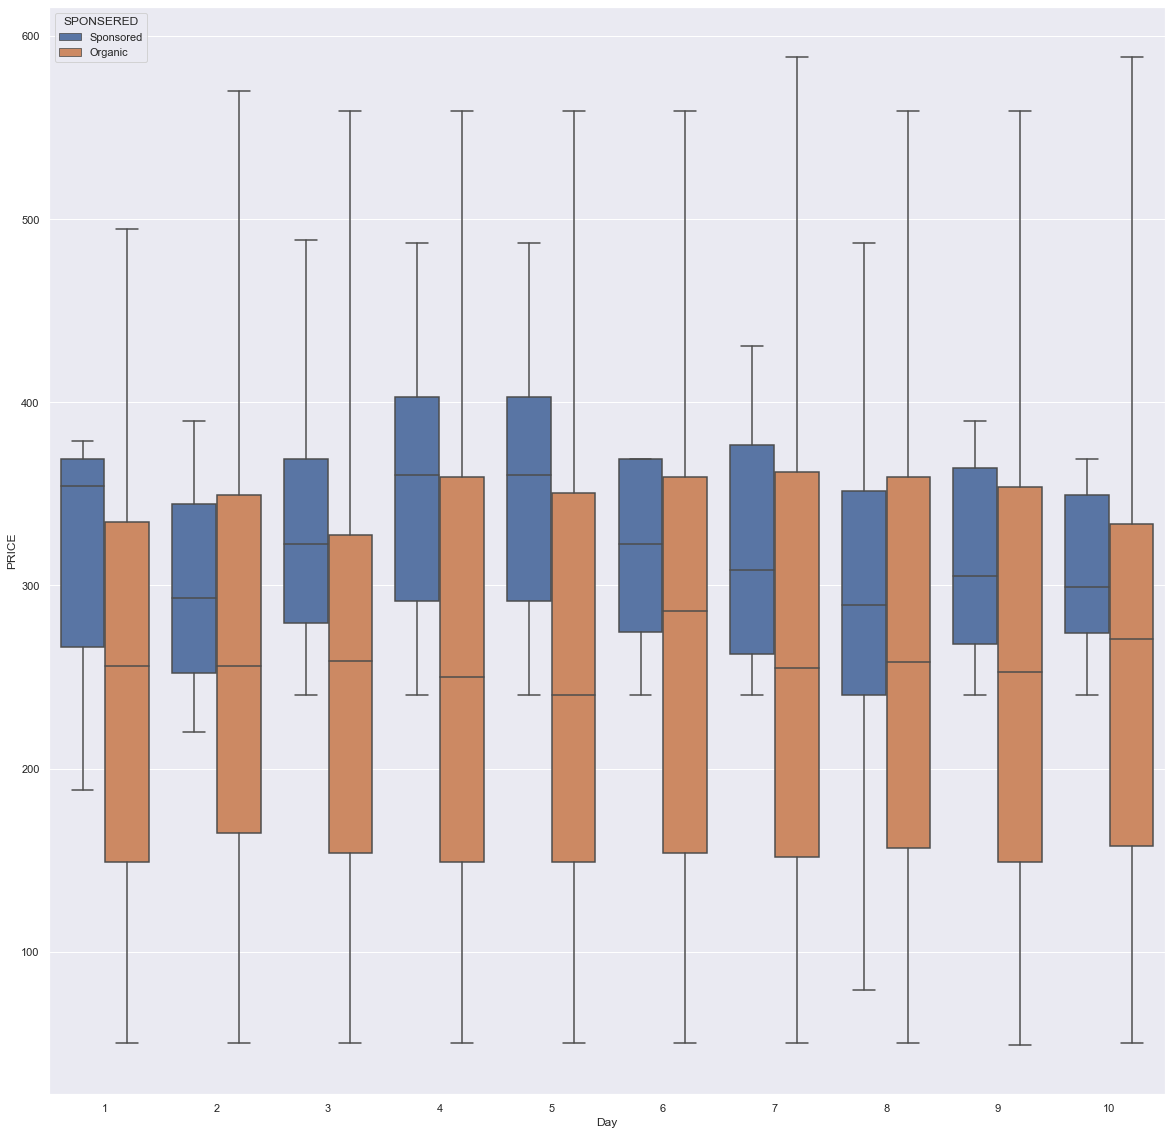

In [10]:
Price = df_total['PRICE']
Day = df_total['Day']
Sponsored = df_total['SPONSERED']
sns.set(rc = {'figure.figsize':(20,20)})
sns.boxplot(x=Day, y=Price, hue=Sponsored, showfliers=False)
plt.show()

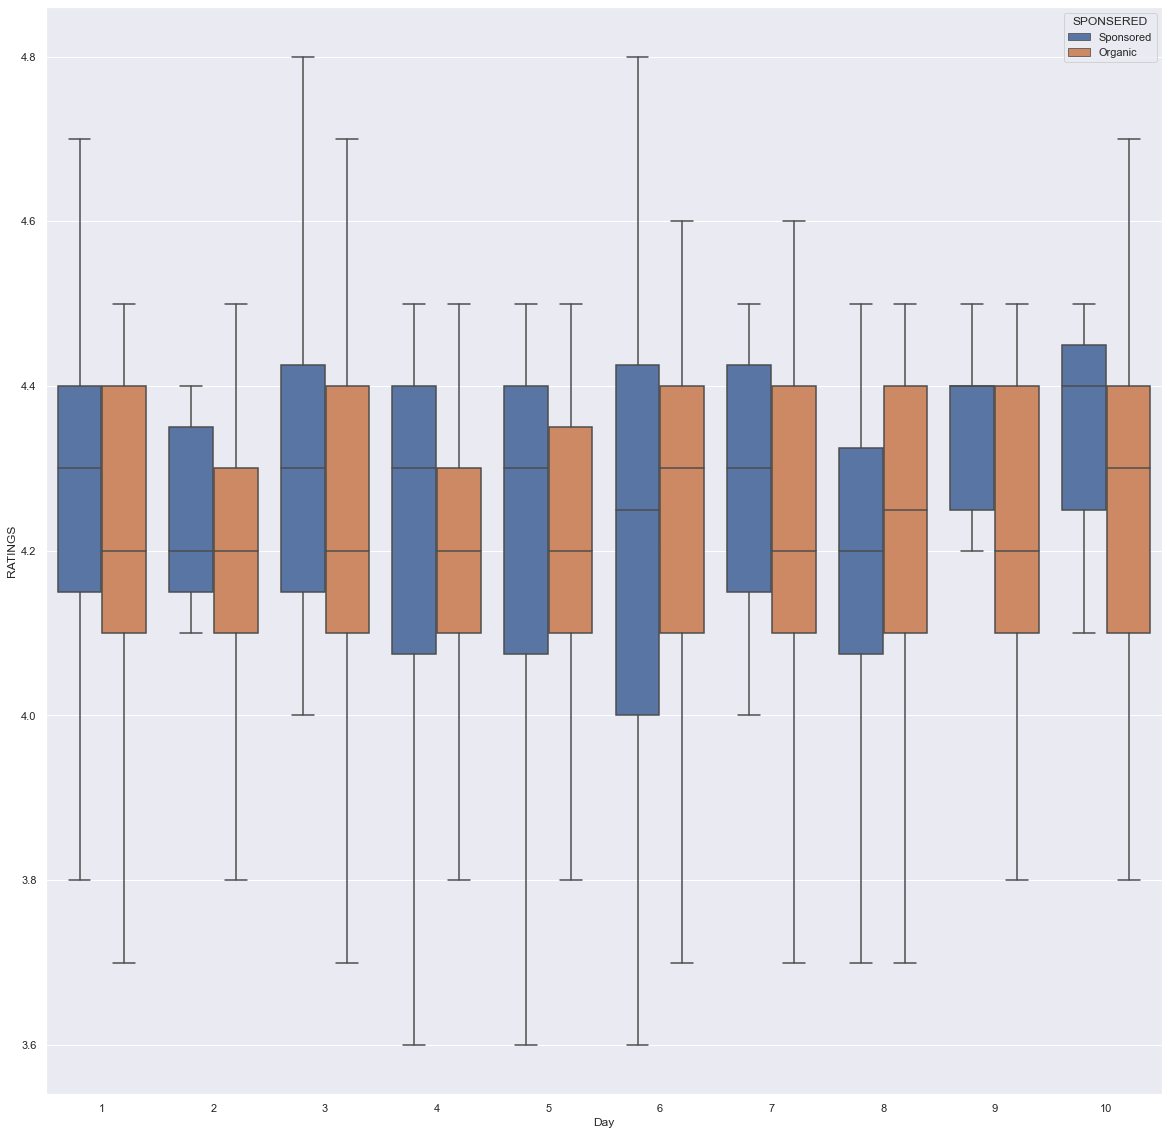

In [11]:
Rating = df_total['RATINGS']
Day = df_total['Day']
Sponsored = df_total['SPONSERED']
sns.set(rc = {'figure.figsize':(20,20)})
sns.boxplot(x=Day, y=Rating, hue=Sponsored, showfliers = False)
plt.show()

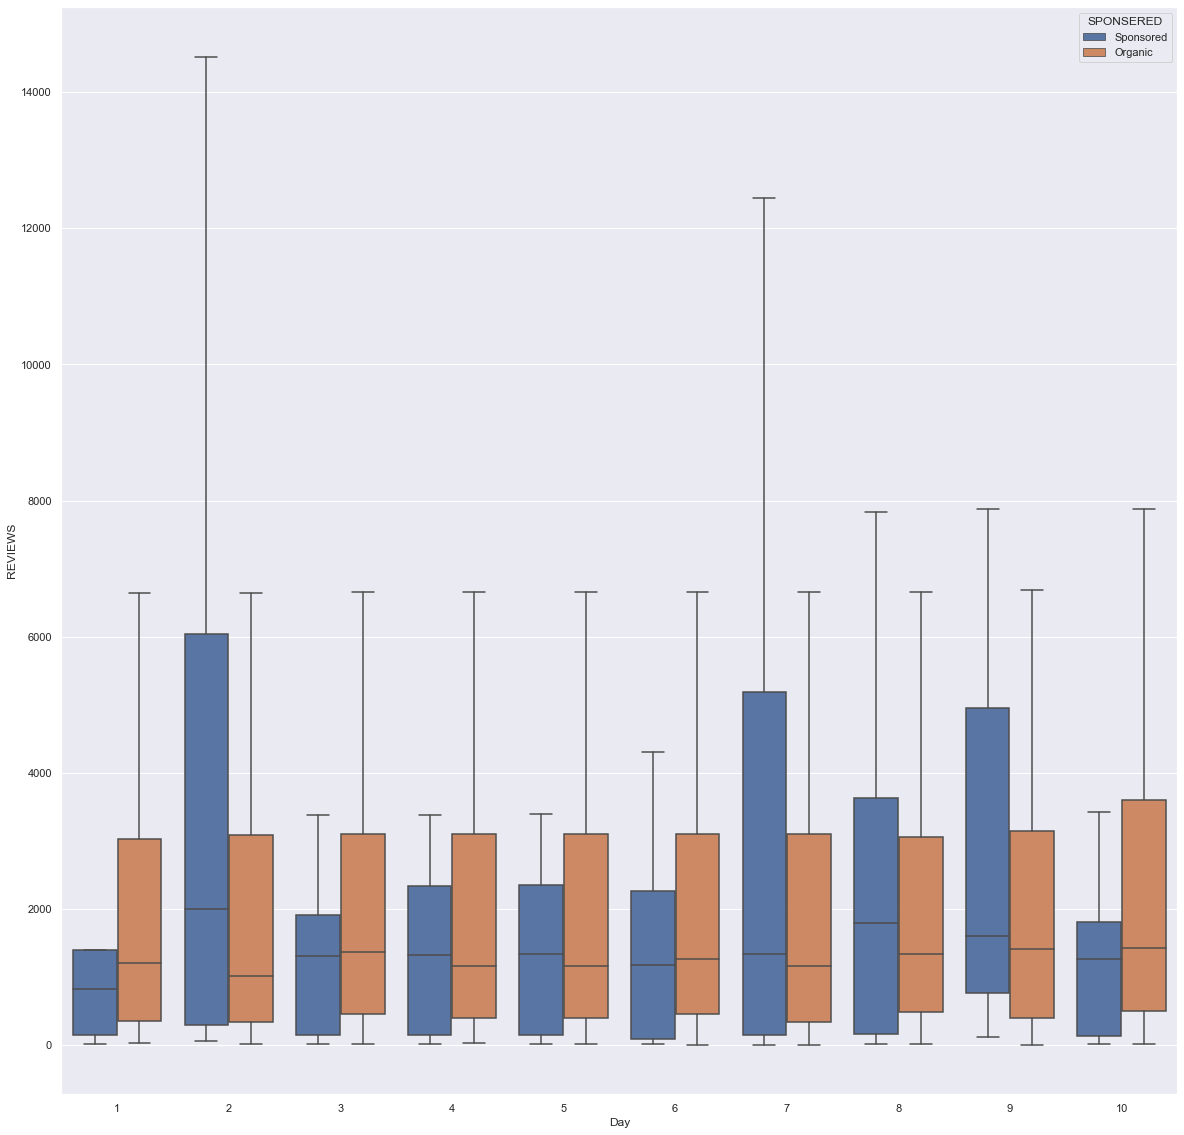

In [12]:
Reviews = df_total['REVIEWS']
Day = df_total['Day']
sns.set(rc = {'figure.figsize':(20,20)})
Sponsored = df_total['SPONSERED']
sns.boxplot(x=Day, y=Reviews, hue=Sponsored, showfliers = False)
plt.show()

# T - TEST

In [14]:
tot_price_s=[]
tot_price_o=[]
tot_ratings_s=[]
tot_ratings_o=[]
tot_num_ratings_s=[]
tot_num_ratings_o=[]
for i in range(1,11):
    file_name="results_tissue_paper_{}.csv"
    file_name=file_name.format(i)
    df = pd.read_csv(file_name)
    df1 = df[0:60]
    df_sponsored = df1.loc[(df1.SPONSERED == 'Sponsored')]
    df_organic = df1.loc[(df.SPONSERED != 'Sponsored')]
    df_sponsored = df_sponsored[df_sponsored['PRICE'].notna()]
    df_organic = df_organic[df_organic['PRICE'].notna()]
    df_sponsored = df_sponsored[df_sponsored['RATINGS'].notna()]
    df_organic = df_organic[df_organic['RATINGS'].notna()]
    df_sponsored = df_sponsored[df_sponsored['REVIEWS'].notna()]
    df_organic = df_organic[df_organic['REVIEWS'].notna()]

    price_s=[]
    price_o=[]
    ratings_s=[]
    ratings_o=[]
    num_ratings_s=[]
    num_ratings_o=[]
    for k in df_sponsored['PRICE']:
        a = k.replace(",", "")
        a = float(a)
        price_s.append(a)

    for k in df_organic['PRICE']:
        a = k.replace(",", "")
        a = float(a)
        price_o.append(a)

    for k in df_sponsored['RATINGS']:
        a = float(k[0:3])
        ratings_s.append(a)

    for k in df_organic['RATINGS']:
        a = float(k[0:3])
        ratings_o.append(a)

    for k in df_sponsored['REVIEWS']:
        try :
            if len(k)>3:
                k=k.split(',')
                k=k[0]+k[1]
            k = int(k)
        except :
            k=0
        num_ratings_s.append(k)

    for k in df_organic['REVIEWS']:
        try :
            if len(k)>3:
                k=k.split(',')
                k=k[0]+k[1]
            k = int(k)
        except :
            k=0
        num_ratings_o.append(k)
    tot_price_s.append(price_s)
    tot_price_o.append(price_o)
    tot_ratings_s.append(ratings_s)
    tot_ratings_o.append(ratings_o)
    tot_num_ratings_s.append(num_ratings_s)
    tot_num_ratings_o.append(num_ratings_o)


In [15]:
for i in range(0,10):
    print("Day "+str(i)+" : ")
    price = stats.ttest_ind(tot_price_s[i],tot_price_o[i])
    print(price)

Day 0 : 
Ttest_indResult(statistic=2.478293176245757, pvalue=0.01613295027551952)
Day 1 : 
Ttest_indResult(statistic=0.7889950547630779, pvalue=0.4334426398869966)
Day 2 : 
Ttest_indResult(statistic=1.868778516394255, pvalue=0.0667951511307512)
Day 3 : 
Ttest_indResult(statistic=2.4113342293917976, pvalue=0.01913926323997715)
Day 4 : 
Ttest_indResult(statistic=2.7450579713464345, pvalue=0.008078195772356866)
Day 5 : 
Ttest_indResult(statistic=1.366693960198412, pvalue=0.1770880526838235)
Day 6 : 
Ttest_indResult(statistic=1.460663353940549, pvalue=0.14959840189581503)
Day 7 : 
Ttest_indResult(statistic=0.7870565548400913, pvalue=0.43445315487713454)
Day 8 : 
Ttest_indResult(statistic=1.3901944336823497, pvalue=0.16997098965611004)
Day 9 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)


In [16]:
for i in range(0,10):
    print("Day "+str(i)+" : ")
    ratings = stats.ttest_ind(tot_ratings_s[i],tot_ratings_o[i])
    print(price)

Day 0 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 1 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 2 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 3 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 4 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 5 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 6 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 7 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 8 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 9 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)


In [17]:
for i in range(0,10):
    print("Day "+str(i)+"  : ")
    num_ratings = stats.ttest_ind(tot_num_ratings_s[i],tot_num_ratings_o[i])
    print(price)

Day 0  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 1  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 2  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 3  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 4  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 5  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 6  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 7  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 8  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)
Day 9  : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)


### Overall T-test Result

In [18]:
df_sponsored = df_total.loc[(df_total.SPONSERED == 'Sponsored')]
df_organic = df_total.loc[(df_total.SPONSERED == 'Organic')]

In [19]:
df_organic

,DESCRIPTION,BRAND,PRICE,RATINGS,REVIEWS,SPONSERED,AMAZONSCHOICE,Limited Time Deal,BestSeller,DealOfDay,ASIN,TIME,DATE,URL,Seller_Name,Day
4,Softouch Tissue Paper Napkins 100 pcs. Each- S...,SofTouch,149.0,4.2,3143,Organic,Amazon's Choice,NaN,NaN,NaN,B08HMNX4FQ,15:18:36.216452,2022-02-28,https://www.amazon.in/Softouch-Tissue-Paper-Na...,Cloudtail India,1
5,Presto! 2 Ply Facial Tissue Soft Pack - 200 Pu...,Presto!,305.0,4.3,7777,Organic,NaN,NaN,Best seller,NaN,B0792T6NXR,15:18:36.218449,2022-02-28,https://www.amazon.in/Amazon-Brand-Presto-Faci...,Cloudtail India,1
6,SofTouch 2 Ply Face tissue paper 100 pulls 200...,SofTouch,145.0,4.0,2393,Organic,NaN,Limited time deal,NaN,NaN,B08YLC195S,15:18:36.220450,2022-02-28,https://www.amazon.in/SofTouch-tissue-paper-sh...,Cloudtail India,1
7,Ezee Tissue Paper Napkins - 100 Pieces (Pack o...,Ezee,149.0,4.3,4131,Organic,NaN,NaN,NaN,NaN,B0758758SQ,15:18:36.221450,2022-02-28,https://www.amazon.in/Ezee-Tissue-Paper-Napkin...,Cloudtail India,1
8,Amazon Brand - Solimo 2 Ply Facial Tissues Car...,Amazon Brand - Solimo,79.0,4.2,4287,Organic,NaN,NaN,NaN,NaN,B07RM4GT89,15:18:36.223450,2022-02-28,https://www.amazon.in/Amazon-Brand-Solimo-Faci...,Cloudtail India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Amazon Brand - Solimo 2 Ply Facial Tissues Car...,Amazon Brand - Solimo,370.0,4.4,1160,Organic,NaN,NaN,NaN,NaN,B07RM39ZY7,01:01:22.875879,2022-03-11,https://www.amazon.in/Amazon-Brand-Solimo-Faci...,Cloudtail India,10
582,Klassic Premium Tissues - 100 Serviettes,Klassic,60.0,3.8,287,Organic,NaN,NaN,NaN,NaN,B00E3QX75C,01:01:22.875879,2022-03-11,https://www.amazon.in/Origami-Klassic-Napkins-...,BKT RETAIL INDIA PRIVATE LIMITED,10
583,Softouch Face Tissue Paper Box 100 pull 200 Sh...,SofTouch,189.0,4.1,104,Organic,NaN,Limited time deal,NaN,NaN,B09BYWL3D6,01:01:22.875879,2022-03-11,https://www.amazon.in/Softouch-Face-Tissue-Pap...,Cloudtail India,10
584,Amazon Brand - Solimo 2 Ply Kitchen Tissue/Tow...,Amazon Brand - Solimo,399.0,4.5,2060,Organic,NaN,NaN,NaN,NaN,B07GVV8C7Z,01:01:22.883903,2022-03-11,https://www.amazon.in/Amazon-Brand-Solimo-Kitc...,Cloudtail India,10


In [20]:
price_s = df_sponsored['PRICE']
price_o = df_organic['PRICE']

price = stats.ttest_ind(price_s, price_o)
print(price)

Ttest_indResult(statistic=4.967025635849458, pvalue=8.923990133157514e-07)


In [21]:
ratings_s = df_sponsored['RATINGS']
ratings_o = df_organic['RATINGS']

ratings = stats.ttest_ind(ratings_s, ratings_o)
print(ratings)

Ttest_indResult(statistic=0.6732501934181091, pvalue=0.5010526559523103)


In [22]:
num_ratings_s = df_sponsored['REVIEWS']
num_ratings_o = df_organic['REVIEWS']

num_ratings = stats.ttest_ind(num_ratings_s, num_ratings_o)
print(num_ratings)

Ttest_indResult(statistic=1.3238846734406855, pvalue=0.18605578127009686)


## WASHING MACHINE

In [23]:
df_total = pd.read_csv("results_monitor_stand_1.csv")
df_total['Day'] = 1
df_total = df_total[0:22]
for i in range(2,11):
    file_name="results_monitor_stand_{}.csv"
    file_name=file_name.format(i)
    df = pd.read_csv(file_name)
    df['Day'] = i
    df1 = df[0:22]
    df_total = df_total.append(df1, ignore_index=True)
df_total.head(600)

,DESCRIPTION,BRAND,PRICE,RATINGS,REVIEWS,SPONSERED,AMAZONSCHOICE,Limited Time Deal,BestSeller,DealOfDay,ASIN,TIME,DATE,URL,Seller_Name,Day
0,"AmazonBasics Monitor Stand, Height Adjustable ...",AmazonBasics,"2,099",4.5 out of 5 stars,"8,063",Sponsored,Amazon's Choice,NaN,NaN,NaN,B07DHK5DHN,14:50:15.863231,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
1,AmazonBasics Dual Monitor Stand - Height-Adjus...,AmazonBasics,"2,849",4.5 out of 5 stars,"4,965",Sponsored,NaN,Limited time deal,NaN,NaN,B076B3Q8JR,14:50:15.867520,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
2,"AmazonBasics Monitor Stand, Height Adjustable ...",AmazonBasics,"2,099",4.5 out of 5 stars,"8,063",NaN,Amazon's Choice,NaN,NaN,NaN,B07DHK5DHN,14:50:15.871221,2022-02-28,https://www.amazon.in/AmazonBasics-Single-Moni...,Cloudtail India,1
3,AmazonBasics Dual Monitor Stand - Height-Adjus...,AmazonBasics,"2,849",4.5 out of 5 stars,"4,965",NaN,NaN,Limited time deal,NaN,NaN,B076B3Q8JR,14:50:15.873218,2022-02-28,https://www.amazon.in/AmazonBasics-Dual-Monito...,Cloudtail India,1
4,Tukzer Single 13 to 27-inch LCD Monitor Desk M...,Tukzer,"1,899",4.4 out of 5 stars,311,NaN,NaN,NaN,NaN,NaN,B09D3WWZ2Y,14:50:15.879220,2022-02-28,https://www.amazon.in/Tukzer-Adjustable-Articu...,Appario Retail Private Ltd,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,"AmazonBasics Wood Monitor Stand, Computer Rise...",AmazonBasics,"1,889",4.7 out of 5 stars,"3,430",NaN,NaN,NaN,NaN,NaN,B07FQS5SCS,01:40:55.977471,2022-03-11,https://www.amazon.in/AmazonBasics-Monitor-Sta...,Cloudtail India,10
216,Wudville Bluewud Norel Monitor/Computer/PC/Scr...,Wudville,558.14,4.3 out of 5 stars,97,NaN,NaN,NaN,NaN,Deal of the Day,B0785GFD58,01:40:55.977471,2022-03-11,https://www.amazon.in/Wudville-Wooden-Monitor-...,Bluewud India,10
217,Rife Single LCD Computer Monitor with Standing...,Rife,"2,199",4.1 out of 5 stars,116,NaN,NaN,NaN,NaN,NaN,B074P13Y6N,01:40:55.985490,2022-03-11,https://www.amazon.in/Rife-Computer-Monitor-Fr...,Rife Technologies,10
218,OET European Standard Heavy Duty Adjustable Al...,OET,"3,599",4.2 out of 5 stars,40,Sponsored,NaN,NaN,NaN,NaN,B08M69WQC7,01:40:55.985490,2022-03-11,https://www.amazon.in/gp/slredirect/picassoRed...,OET-Br,10


In [24]:
df_total = df_total[df_total['PRICE'].notna()]
df_total = df_total[df_total['RATINGS'].notna()]
df_total = df_total[df_total['REVIEWS'].notna()]

In [25]:
df_total.reset_index(drop=True, inplace=True)

In [26]:
len(df_total)

213

In [27]:
x=0
y=0
z=0
for i in range(len(df_total)):
    try:
        k = df_total['PRICE'][i]
        a = k.replace(",", "")
        a = float(a)
        df_total['PRICE'][i] = a
        x=x+1
    except:
        a=0
i=0        
for k in df_total['RATINGS']:
    try:
        #k = df_total['RATINGS'][i]
        a = float(k[0:3])
        #print(a)
        df_total['RATINGS'][i] = a
        i=i+1
        y=y+1
    except:
        i=i+1
        #print(df_total['RATINGS'][i])
    
for i in range(len(df_total)):
    try :
        k = df_total['REVIEWS'][i]
        if len(k)>3:
            k=k.split(',')
            k=k[0]+k[1]
        
        df_total['REVIEWS'][i] = int(k)
        z=z+1
    except:
        a=0


<ipython-input-27-6b039225cb2e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['PRICE'][i] = a
<ipython-input-27-6b039225cb2e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['RATINGS'][i] = a
<ipython-input-27-6b039225cb2e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['REVIEWS'][i] = int(k)


In [28]:
df_total

,DESCRIPTION,BRAND,PRICE,RATINGS,REVIEWS,SPONSERED,AMAZONSCHOICE,Limited Time Deal,BestSeller,DealOfDay,ASIN,TIME,DATE,URL,Seller_Name,Day
0,"AmazonBasics Monitor Stand, Height Adjustable ...",AmazonBasics,2099.0,4.5,8063,Sponsored,Amazon's Choice,NaN,NaN,NaN,B07DHK5DHN,14:50:15.863231,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
1,AmazonBasics Dual Monitor Stand - Height-Adjus...,AmazonBasics,2849.0,4.5,4965,Sponsored,NaN,Limited time deal,NaN,NaN,B076B3Q8JR,14:50:15.867520,2022-02-28,https://www.amazon.in/gp/slredirect/picassoRed...,Cloudtail India,1
2,"AmazonBasics Monitor Stand, Height Adjustable ...",AmazonBasics,2099.0,4.5,8063,NaN,Amazon's Choice,NaN,NaN,NaN,B07DHK5DHN,14:50:15.871221,2022-02-28,https://www.amazon.in/AmazonBasics-Single-Moni...,Cloudtail India,1
3,AmazonBasics Dual Monitor Stand - Height-Adjus...,AmazonBasics,2849.0,4.5,4965,NaN,NaN,Limited time deal,NaN,NaN,B076B3Q8JR,14:50:15.873218,2022-02-28,https://www.amazon.in/AmazonBasics-Dual-Monito...,Cloudtail India,1
4,Tukzer Single 13 to 27-inch LCD Monitor Desk M...,Tukzer,1899.0,4.4,311,NaN,NaN,NaN,NaN,NaN,B09D3WWZ2Y,14:50:15.879220,2022-02-28,https://www.amazon.in/Tukzer-Adjustable-Articu...,Appario Retail Private Ltd,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,"AmazonBasics Wood Monitor Stand, Computer Rise...",AmazonBasics,1889.0,4.7,3430,NaN,NaN,NaN,NaN,NaN,B07FQS5SCS,01:40:55.977471,2022-03-11,https://www.amazon.in/AmazonBasics-Monitor-Sta...,Cloudtail India,10
209,Wudville Bluewud Norel Monitor/Computer/PC/Scr...,Wudville,558.14,4.3,97,NaN,NaN,NaN,NaN,Deal of the Day,B0785GFD58,01:40:55.977471,2022-03-11,https://www.amazon.in/Wudville-Wooden-Monitor-...,Bluewud India,10
210,Rife Single LCD Computer Monitor with Standing...,Rife,2199.0,4.1,116,NaN,NaN,NaN,NaN,NaN,B074P13Y6N,01:40:55.985490,2022-03-11,https://www.amazon.in/Rife-Computer-Monitor-Fr...,Rife Technologies,10
211,OET European Standard Heavy Duty Adjustable Al...,OET,3599.0,4.2,40,Sponsored,NaN,NaN,NaN,NaN,B08M69WQC7,01:40:55.985490,2022-03-11,https://www.amazon.in/gp/slredirect/picassoRed...,OET-Br,10


In [29]:
df_total['SPONSERED'] = df_total['SPONSERED'].fillna('Organic')

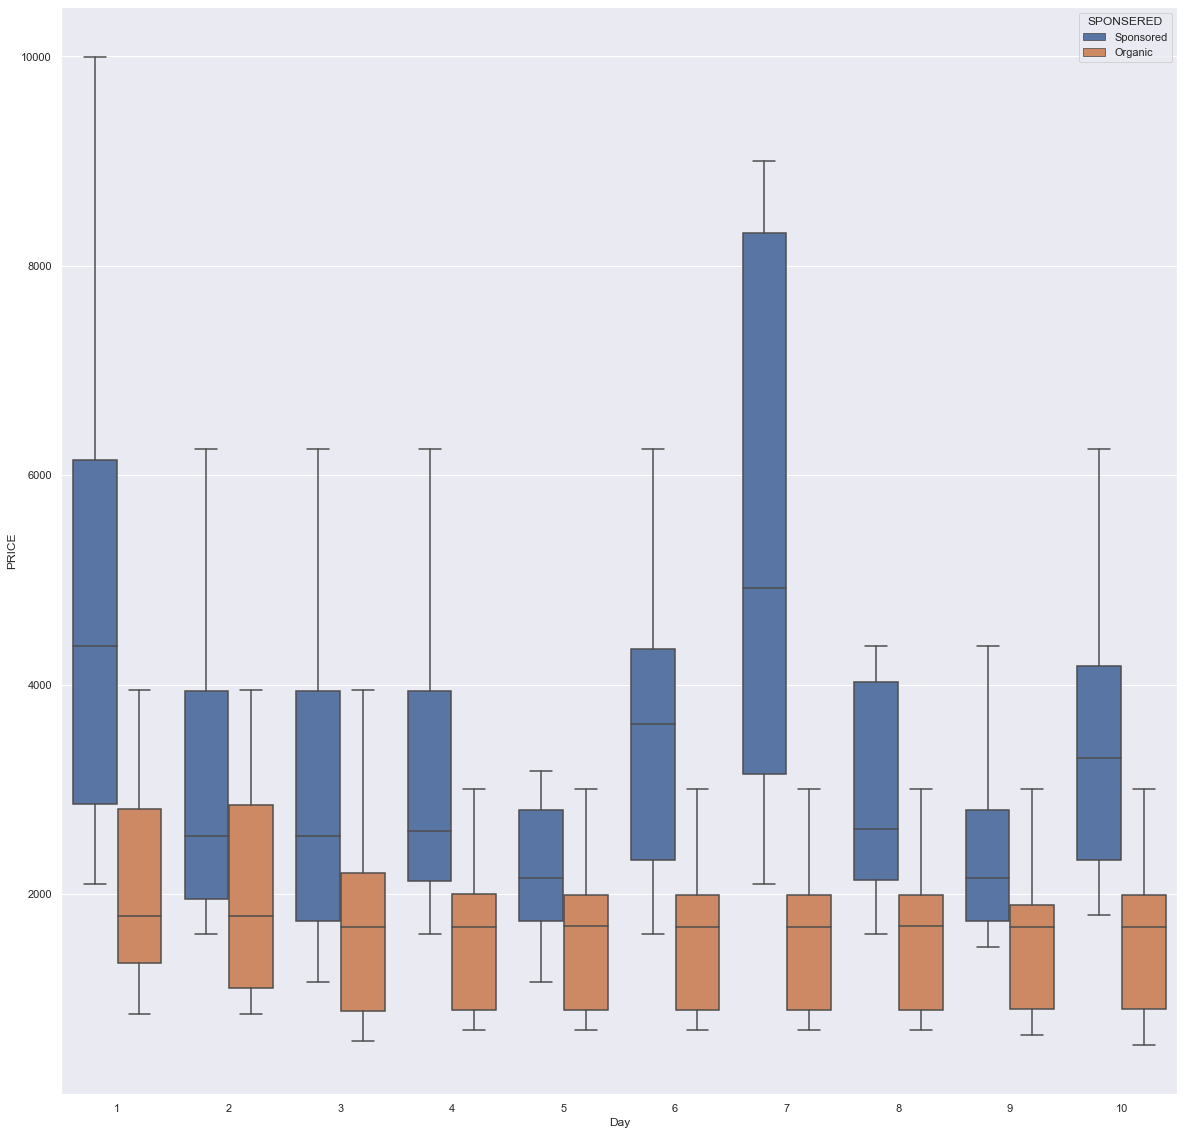

In [30]:
Price = df_total['PRICE']
Day = df_total['Day']
Sponsored = df_total['SPONSERED']
sns.set(rc = {'figure.figsize':(20,20)})
sns.boxplot(x=Day, y=Price, hue=Sponsored, showfliers=False)
plt.show()

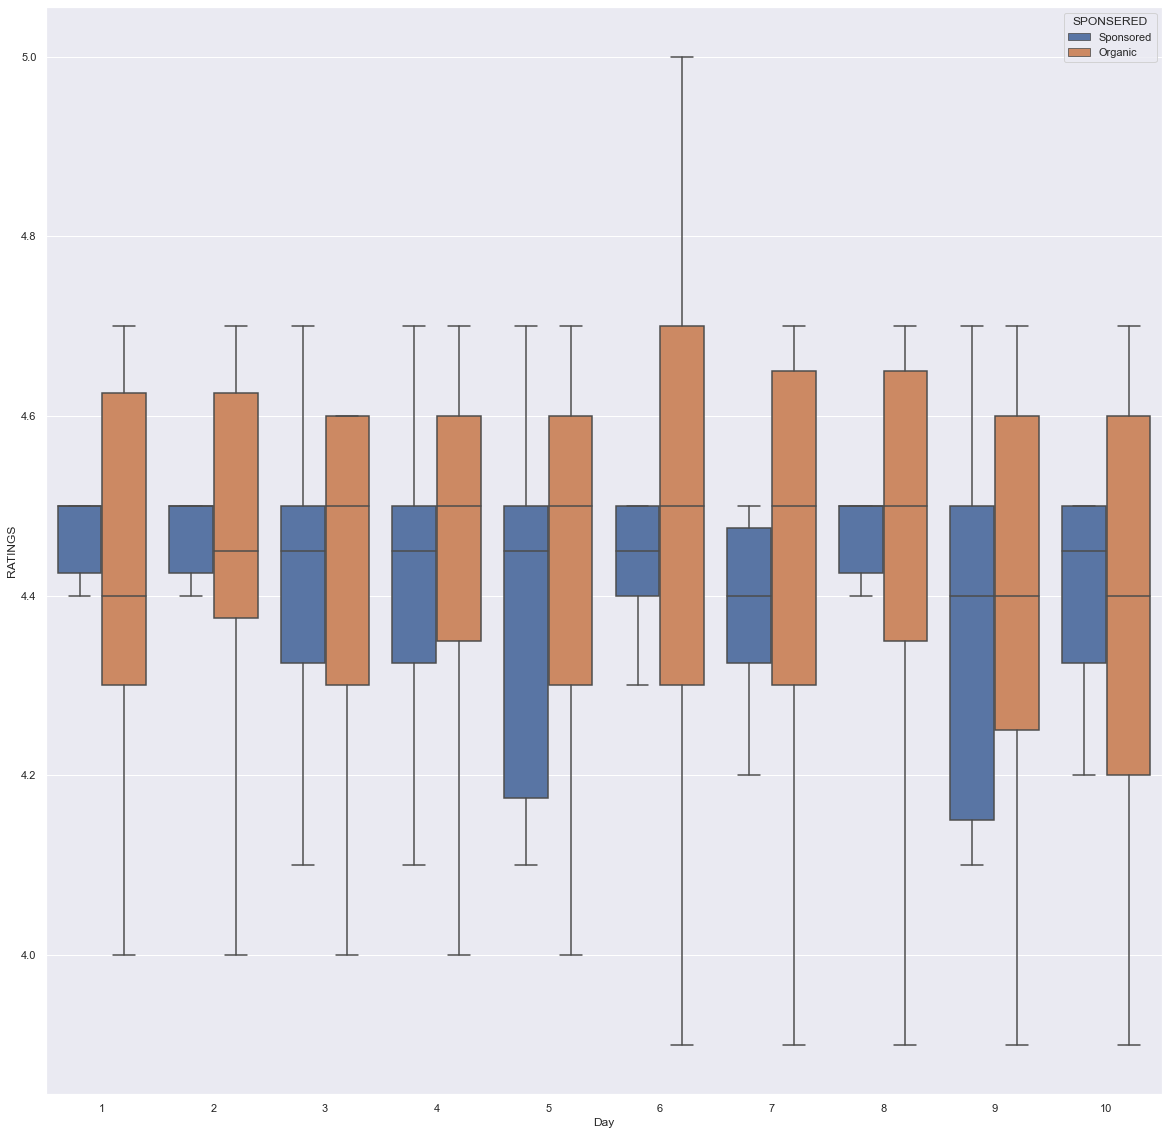

In [31]:
Rating = df_total['RATINGS']
Day = df_total['Day']
Sponsored = df_total['SPONSERED']
sns.set(rc = {'figure.figsize':(20,20)})
sns.boxplot(x=Day, y=Rating, hue=Sponsored, showfliers = False)
plt.show()

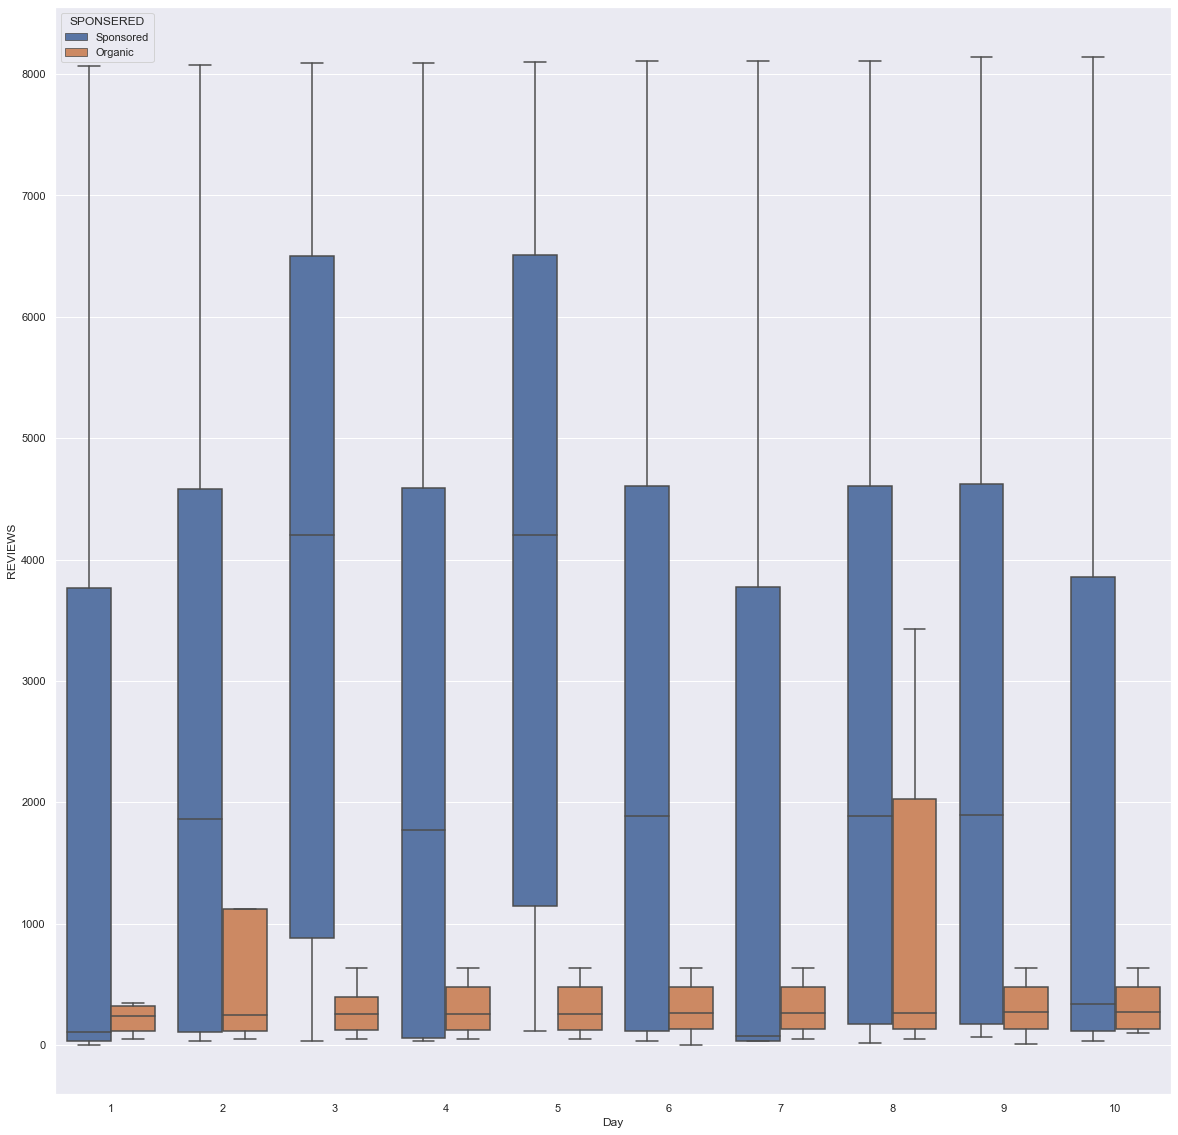

In [32]:
Reviews = df_total['REVIEWS']
Day = df_total['Day']
sns.set(rc = {'figure.figsize':(20,20)})
Sponsored = df_total['SPONSERED']
sns.boxplot(x=Day, y=Reviews, hue=Sponsored, showfliers = False)
plt.show()

# T - TEST

In [34]:
for i in range(0,10):
    print("Day "+str(i)+" : ")
    price = stats.ttest_ind(tot_price_s[i],tot_price_o[i])
    print(price)

Day 0 : 
Ttest_indResult(statistic=2.478293176245757, pvalue=0.01613295027551952)
Day 1 : 
Ttest_indResult(statistic=0.7889950547630779, pvalue=0.4334426398869966)
Day 2 : 
Ttest_indResult(statistic=1.868778516394255, pvalue=0.0667951511307512)
Day 3 : 
Ttest_indResult(statistic=2.4113342293917976, pvalue=0.01913926323997715)
Day 4 : 
Ttest_indResult(statistic=2.7450579713464345, pvalue=0.008078195772356866)
Day 5 : 
Ttest_indResult(statistic=1.366693960198412, pvalue=0.1770880526838235)
Day 6 : 
Ttest_indResult(statistic=1.460663353940549, pvalue=0.14959840189581503)
Day 7 : 
Ttest_indResult(statistic=0.7870565548400913, pvalue=0.43445315487713454)
Day 8 : 
Ttest_indResult(statistic=1.3901944336823497, pvalue=0.16997098965611004)
Day 9 : 
Ttest_indResult(statistic=1.285140154479124, pvalue=0.20394085826995426)


In [ ]:
for i in range(0,10):
    print("Day "+str(i)+" : ")
    price = stats.ttest_ind(tot_ratings_s[i],tot_ratings_o[i])
    print(price)

In [ ]:
for i in range(0,10):
    print("Day "+str(i)+"  : ")
    price = stats.ttest_ind(tot_num_ratings_s[i],tot_num_ratings_o[i])
    print(price)

## Overall T-test Result

In [35]:
df_sponsored = df_total.loc[(df_total.SPONSERED == 'Sponsored')]
df_organic = df_total.loc[(df_total.SPONSERED == 'Organic')]

In [36]:
price_s = df_sponsored['PRICE']
price_o = df_organic['PRICE']

price = stats.ttest_ind(price_s, price_o)
print(price)

Ttest_indResult(statistic=8.107958344703396, pvalue=4.154019038156651e-14)


In [37]:
ratings_s = df_sponsored['RATINGS']
ratings_o = df_organic['RATINGS']

ratings = stats.ttest_ind(ratings_s, ratings_o)
print(ratings)

Ttest_indResult(statistic=-0.09247011535949698, pvalue=0.9264122703183475)


In [38]:
num_ratings_s = df_sponsored['REVIEWS']
num_ratings_o = df_organic['REVIEWS']

num_ratings = stats.ttest_ind(num_ratings_s, num_ratings_o)
print(num_ratings)

Ttest_indResult(statistic=2.904589736676692, pvalue=0.004068861209385857)
